In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Entropy - measure of impurity

In [2]:
#p = target class, so 1-p = not-target class
#if p=0 the funciton should return 0

def entropy(p):
    if p.sum()==0 or p.sum()==1:
        return 0
    else:
        return -p * np.log2(p) - (1-p) * np.log2(1-p)


Text(0, 0.5, 'Entropy')

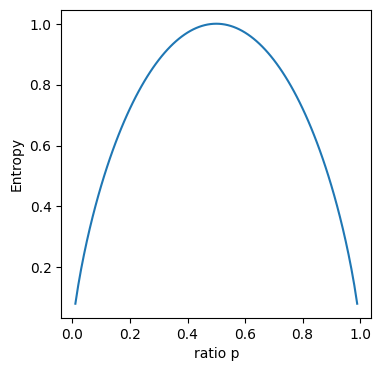

In [3]:
p_ = np.array(range(1,100,1))/100

fig, ax = plt.subplots(figsize=(4,4))
ax.plot(p_,entropy(p_))
ax.set_xlabel("ratio p")
ax.set_ylabel("Entropy")

# Information Gain (purity)

In [4]:
def InformationGain(left_right_arrays):
    """
    inputs:
        left_right_arrays = array of 2 lists depending on a target features, ex. target(1) = cat:
            left_arr = np.array([1, 0, 0]) ~ 1 cat and 2 dogs
            right_arr = np.array([0, 1, 1, 1, 0]) ~ 3 cats and 2 dogs
    outputs:
        information gain, higher = better
    """

    left_arr = left_right_arrays[0]
    right_arr = left_right_arrays[1]

    left_impurity = entropy(left_arr.sum() / len(left_arr))
    right_impurity = entropy(right_arr.sum() / len(right_arr))

    total_cnt = len(left_arr) + len(right_arr)
    left_weight = len(left_arr) / total_cnt
    right_weight = len(right_arr) / total_cnt

    InformationLoss = left_impurity * left_weight + right_impurity * right_weight
    InformationGain = entropy(np.array([0.5])) - InformationLoss

    return InformationGain

# Binary Classification example

## Data (one-hot encoded)

In [5]:
x_train = np.array([
 [1, 1, 1],
 [0, 0, 1],
 [0, 1, 0],
 [1, 0, 1],
 [1, 1, 1],
 [1, 1, 0],
 [0, 0, 0],
 [1, 1, 0],
 [0, 1, 0],
 [0, 1, 0]])

y_train = np.array([1, 1, 0, 0, 1, 1, 0, 1, 0, 0])

x_train.shape, y_train.shape

((10, 3), (10,))

## Finding decision tree root

In [6]:
target = 1
features_qty = x_train.shape[1]
features_information_gain = []

for feature in range(features_qty):
    
    #split into targets and others
    left_selection = y_train[x_train[0:,feature]==target]
    right_selection = y_train[x_train[0:,feature]!=target]

    IG = InformationGain([left_selection, right_selection])
    features_information_gain.append(IG)

print(f"feature 0 gain = {features_information_gain[0]}\n \
feature 1 gain = {features_information_gain[1]}\n \
feature 2 gain = {features_information_gain[2]}")

feature 0 gain = [0.27807191]
 feature 1 gain = [0.03485155]
 feature 2 gain = [0.12451125]


## Visualization
<img src="./images/Screenshot 2023-07-28 at 21.16.10.png"></img>

# Recursive full-depth algo

In [7]:
target = 1

def next_best_feature(x_train, y_train, features_to_use, indepth_index, decision_tree):

    best_feature = []
    features_ig = np.zeros(x_train.shape[1])

    #assess Information Gain for every feature in x_train, and pick the highest

    for feature in range(x_train.shape[1]):
        if feature in features_to_use:
            left_selection = y_train[x_train[:,feature]==target]
            right_selection = y_train[x_train[:,feature]!=target]
            IG = InformationGain([left_selection, right_selection])
            features_ig[feature]=IG
        else:
            continue

    best_feature = np.argmax(features_ig)
    decision_tree.append([indepth_index, best_feature])
    #print(f"depth index = {indepth_index}, ig assessment = {features_ig}, best_feature - {best_feature}")

    # exclude best feature from future analysis

    left_features = [i for i in features_to_use if i != best_feature]

    # exit case 1 - all features were assessed

    if len(left_features)<=1:
        #print("reached the root")
        return "exit"

    # exit case 2 - no information gain anymore

    if np.sum(features_ig)==0:
        #print("no further improvement")
        return "exit"

        #left branch subset

    reduced_x_left = x_train[x_train[:,best_feature]==target]
    reduced_y_left = y_train[x_train[:,best_feature]==target]

    next_best_feature(reduced_x_left, reduced_y_left, left_features, indepth_index + 1, decision_tree)

        # right branch subset

    reduced_x_right = x_train[x_train[:,best_feature]!=target]
    reduced_y_right = y_train[x_train[:,best_feature]!=target]

    next_best_feature(reduced_x_right, reduced_y_right, left_features, indepth_index + 1, decision_tree)

    return best_feature, reduced_x_left, reduced_y_left, reduced_x_right, reduced_y_right, left_features, decision_tree

## Generate decision tree

In [8]:
def decision_tree(x_train, y_train):
    
    decision_tree = np.array([])
    features_to_assess = np.arange(x_train.shape[1])
    
    best_feature, reduced_x_left, reduced_y_left, reduced_x_right, reduced_y_right, features_to_use, decision_tree = next_best_feature(x_train, y_train, features_to_assess, indepth_index = 0, decision_tree = [])

    t = np.array(decision_tree)
    t[t[:,0].argsort()][:,1]

    level = []

    for i in np.unique(t[:,0]):
        level.append(t[t[:,0]==i][:,1])

    return level


## Testing the algorithm

Example 1 (same as in lection)

In [9]:
decision_tree(x_train, y_train)

[array([0]), array([1, 2])]

Example 2 (larger dataset)

In [10]:
x_ = np.random.uniform(low=0, high=1, size=(500,7))
x_test = np.round(x_,0)
y_ = np.random.uniform(low=0, high=1, size=(500,1))
y_test = np.round(y_,0)

In [11]:
decision_tree(x_test, y_test)

[array([5]),
 array([4, 0]),
 array([0, 1, 2, 4]),
 array([6, 3, 3, 6, 1, 4, 3, 6]),
 array([3, 3, 1, 2, 6, 2, 2, 2, 3, 6, 1, 6, 2, 2, 1, 1]),
 array([1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 0, 0, 0, 3, 0, 3, 6, 6, 4, 4, 6, 6,
        3, 1, 6, 1, 6, 1, 2, 2, 2, 2])]